In [102]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Segmentation and grouping of neighborhoods in the city of Toronto

## Population of the city of Toronto.
Source:https://en.wikipedia.org/wiki/Toronto

In [4]:
#Population of the city of Toronto.
population_t=2731571

## Geograpical coordinate information 

In [5]:
#We are looking for the location of the SCHOOL: “Kaplan International Languages” in Toronto
schooltor='Kaplan International Languages'
address = '35 The Esplanade #250, Toronto, Canada'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} in Toronto are {}, {}.'.format(schooltor,latitude, latitude))

The geograpical coordinate of Kaplan International Languages in Toronto are 43.6462259, 43.6462259.


## Determined which neighborhood has the lowest crime rate based on data obtained from city police departments

Information obtained from the Toronto police department: https://opendata.arcgis.com/datasets/94229ca8628f43f591a74ec3a2a6d4b5_0.geojson

In [7]:
#these are the registered crimes committed in 2019 in the city of Toronto
crime_t=pd.read_csv('Toronto_Crime.csv')
totalcrimesToronto=crime_t.shape[0]
print("Total number of crimes: ",totalcrimes)
crime_t.head()

Total number of crimes:  38770


,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-79.227135,43.810932,131401,GO-2019508688,2019-03-20T21:56:00.000Z,2019-03-20T21:56:00.000Z,Outside,1450,120,Discharge Firearm With Intent,2019,March,20,79,Wednesday,21,2019.0,March,20.0,79.0,Wednesday,21,Assault,D42,132,Malvern (132),-79.227135,43.810932,131002
1,-79.415932,43.723015,131601,GO-20191095009,2019-06-14T00:09:00.000Z,2019-06-14T00:09:00.000Z,Apartment,1420,100,Assault With Weapon,2019,June,14,165,Friday,0,2019.0,June,14.0,165.0,Friday,0,Assault,D32,39,Bedford Park-Nortown (39),-79.415932,43.723015,131005
2,-79.555473,43.674221,131819,GO-201912107,2019-01-03T02:15:00.000Z,2019-01-03T02:15:00.000Z,Commercial,1610,210,Robbery - Business,2019,January,3,3,Thursday,2,2019.0,January,3.0,3.0,Thursday,2,Robbery,D22,10,Princess-Rosethorn (10),-79.555473,43.674221,131024
3,-79.435364,43.644207,131820,GO-201923470,2019-01-04T20:34:00.000Z,2019-01-04T20:34:00.000Z,Apartment,1480,100,Assault - Resist/ Prevent Seiz,2019,January,4,4,Friday,20,2019.0,January,4.0,4.0,Friday,20,Assault,D11,86,Roncesvalles (86),-79.435364,43.644207,131025
4,-79.322212,43.773506,131821,GO-201929353,2019-01-05T20:41:00.000Z,2019-01-05T20:41:00.000Z,Outside,1450,100,Discharge Firearm - Recklessly,2019,January,5,5,Saturday,20,2019.0,January,5.0,5.0,Saturday,20,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.322212,43.773506,131026


In [8]:
#These are the types of crimes committed with their frequencies
crime_t['offence'].value_counts().head(10)

Assault                   13846
B&E                        7144
Theft Of Motor Vehicle     5186
Assault With Weapon        3436
B&E W'Intent               1007
Robbery - Mugging           963
Assault Bodily Harm         787
Theft Over                  772
Assault Peace Officer       697
Robbery With Weapon         643
Name: offence, dtype: int64

In [9]:
#we keep the columns we need
crime_t=crime_t[['offence','Neighbourhood','Long', 'Lat']]
crime_t.head()

,offence,Neighbourhood,Long,Lat
0,Discharge Firearm With Intent,Malvern (132),-79.227135,43.810932
1,Assault With Weapon,Bedford Park-Nortown (39),-79.415932,43.723015
2,Robbery - Business,Princess-Rosethorn (10),-79.555473,43.674221
3,Assault - Resist/ Prevent Seiz,Roncesvalles (86),-79.435364,43.644207
4,Discharge Firearm - Recklessly,Tam O'Shanter-Sullivan (118),-79.322212,43.773506


In [10]:
c=[]
for i in range(38770):
    c.append(1)

crime_t["Count"]=c


In [11]:
groupt = crime_t.groupby(['Neighbourhood']).agg(
                                  {'Long': 'mean', 
                                   'Lat':'mean', 
                                   'Count':'sum'
                                  }).reset_index() #options: min, max, mean(promedio), sum (suma)
print(groupt.shape)
groupt.head()

(140, 4)


,Neighbourhood,Long,Lat,Count
0,Agincourt North (129),-79.268526,43.807124,214
1,Agincourt South-Malvern West (128),-79.263989,43.788137,329
2,Alderwood (20),-79.542090,43.604308,88
3,Annex (95),-79.400859,43.670728,603
4,Banbury-Don Mills (42),-79.348472,43.736074,221


In [12]:
# set number of clusters
kclusters = 5

crime_clustering = groupt.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crime_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 3, 2, 0, 4, 0, 0, 2])

In [13]:
dt_merged = groupt

dt_merged.insert(0, 'Cluster Labels', kmeans.labels_)


In [14]:
dt_merged.head() # check the last columns!

,Cluster Labels,Neighbourhood,Long,Lat,Count
0,2,Agincourt North (129),-79.268526,43.807124,214
1,2,Agincourt South-Malvern West (128),-79.263989,43.788137,329
2,0,Alderwood (20),-79.542090,43.604308,88
3,3,Annex (95),-79.400859,43.670728,603
4,2,Banbury-Don Mills (42),-79.348472,43.736074,221


In [17]:
from folium import plugins

# let's start again with a clean copy of the map on Toronto 
mapt = folium.Map(location = [latitude, longitude], zoom_start = 13)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['Lat'], dt_merged['Long'], dt_merged['Neighbourhood'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapt)

    
# add a big yellow marker that is the location of the school to map
labelst = '{}'.format(schooltor)
labelst = folium.Popup(labelst, parse_html=True)
folium.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup=labelst,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(mapt)
# display map
mapt

# Examine Clusters

In [18]:
#Neighborhoods with the lowest crime rate
sft=dt_merged.loc[dt_merged['Cluster Labels'] == 0]
sft

,Cluster Labels,Neighbourhood,Long,Lat,Count
2,0,Alderwood (20),-79.542090,43.604308,88
5,0,Bathurst Manor (34),-79.452848,43.760153,113
7,0,Bayview Village (52),-79.377071,43.772145,167
8,0,Bayview Woods-Steeles (49),-79.382030,43.795660,90
10,0,Beechborough-Greenbrook (112),-79.477099,43.692802,105
14,0,Blake-Jones (69),-79.338892,43.676726,109
15,0,Briar Hill-Belgravia (108),-79.448762,43.698667,182
16,0,Bridle Path-Sunnybrook-York Mills (41),-79.383279,43.730536,122
17,0,Broadview North (57),-79.352463,43.688432,116
20,0,Caledonia-Fairbank (109),-79.454440,43.689307,121


In [19]:
dt_merged.loc[dt_merged['Cluster Labels'] == 1]

,Cluster Labels,Neighbourhood,Long,Lat,Count
33,1,Downsview-Roding-CFB (26),-79.498554,43.727906,796
62,1,Kensington-Chinatown (78),-79.397971,43.653296,773
79,1,Moss Park (73),-79.369345,43.656940,1080
124,1,West Humber-Clairville (1),-79.598323,43.723416,1012
138,1,York University Heights (27),-79.489712,43.763564,729


In [20]:
dt_merged.loc[dt_merged['Cluster Labels'] == 2]. head()

,Cluster Labels,Neighbourhood,Long,Lat,Count
0,2,Agincourt North (129),-79.268526,43.807124,214
1,2,Agincourt South-Malvern West (128),-79.263989,43.788137,329
4,2,Banbury-Don Mills (42),-79.348472,43.736074,221
9,2,Bedford Park-Nortown (39),-79.421559,43.730561,250
12,2,Birchcliffe-Cliffside (122),-79.261822,43.697093,317


In [21]:
dt_merged.loc[dt_merged['Cluster Labels'] == 3]. head()

,Cluster Labels,Neighbourhood,Long,Lat,Count
3,3,Annex (95),-79.400859,43.670728,603
11,3,Bendale (127),-79.258109,43.762611,422
24,3,Clairlea-Birchmount (120),-79.281114,43.715687,464
32,3,Dovercourt-Wallace Emerson-Junction (93),-79.439034,43.664443,548
45,3,Glenfield-Jane Heights (25),-79.514287,43.748215,530


In [22]:
dt_merged.loc[dt_merged['Cluster Labels'] == 4]

,Cluster Labels,Neighbourhood,Long,Lat,Count
6,4,Bay Street Corridor (76),-79.383531,43.657332,1368
23,4,Church-Yonge Corridor (75),-79.379627,43.659359,1421
122,4,Waterfront Communities-The Island (77),-79.387108,43.645102,1409


The distance between the neighborhoods and the school is calculated

In [23]:
# Calculate distance between neighborhood and school in Toronto
from geopy.distance import geodesic

km=[]

for i in range (74):
    l=sft['Lat'].iloc[i]
    lo=sft['Long'].iloc[i]
    dis=float(geodesic((l,lo),(latitude, longitude)).km)
    km.append(dis)

In [24]:
sft['Distance_km']=km
sft.head()

<ipython-input-24-edb97a281d20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sft['Distance_km']=km


,Cluster Labels,Neighbourhood,Long,Lat,Count,Distance_km
2,0,Alderwood (20),-79.542090,43.604308,88,14.262028
5,0,Bathurst Manor (34),-79.452848,43.760153,113,14.125602
7,0,Bayview Village (52),-79.377071,43.772145,167,13.991340
8,0,Bayview Woods-Steeles (49),-79.382030,43.795660,90,16.612620
10,0,Beechborough-Greenbrook (112),-79.477099,43.692802,105,9.720710


In [25]:
sft=sft.sort_values('Distance_km')
sft.head(10)

,Cluster Labels,Neighbourhood,Long,Lat,Count,Distance_km
88,0,North Riverdale (68),-79.350422,43.673918,169,3.663167
94,0,Palmerston-Little Italy (80),-79.419239,43.660618,190,3.905629
97,0,Playter Estates-Danforth (67),-79.354481,43.678631,139,3.964881
71,0,Little Portugal (84),-79.428972,43.646881,178,4.349576
14,0,Blake-Jones (69),-79.338892,43.676726,109,4.471990
21,0,Casa Loma (96),-79.410057,43.682314,100,4.903198
137,0,Yonge-St.Clair (97),-79.396891,43.688108,81,4.975053
17,0,Broadview North (57),-79.352463,43.688432,116,5.031337
34,0,Dufferin Grove (83),-79.436471,43.655997,183,5.071196
135,0,Wychwood (94),-79.425763,43.678444,137,5.434459


In [26]:
sft_t10=sft.head(10)

## Query on Foursquare and Explore Safety Neighborhoods 

In [27]:
CLIENT_ID = 'LRGCXLZ3GZCILAWSLKL23EMPKIKDKNG5HOXS10QQUO2MHB2J' # your Foursquare ID
CLIENT_SECRET = '5DEKXD4LLKJYT1UH2GNAVMMEZZ0HX2QYQCD4A2P5UMHOFG53' # your Foursquare Secret
VERSION = '20190425' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LRGCXLZ3GZCILAWSLKL23EMPKIKDKNG5HOXS10QQUO2MHB2J
CLIENT_SECRET:5DEKXD4LLKJYT1UH2GNAVMMEZZ0HX2QYQCD4A2P5UMHOFG53


In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
t_venues = getNearbyVenues(names=sft_t10['Neighbourhood'],
                                   latitudes=sft_t10['Lat'],
                                   longitudes=sft_t10['Long']
                                  )

North Riverdale (68)
Palmerston-Little Italy (80)
Playter Estates-Danforth (67)
Little Portugal (84)
Blake-Jones (69)
Casa Loma (96)
Yonge-St.Clair (97)
Broadview North (57)
Dufferin Grove (83)
Wychwood (94)


In [30]:
print(t_venues.shape)
t_venues.head()


(398, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Riverdale (68),43.673918,-79.350422,Withrow Park,43.674899,-79.348437,Park
1,North Riverdale (68),43.673918,-79.350422,Withrow Park Off Leash Dog Park,43.674019,-79.346764,Dog Run
2,North Riverdale (68),43.673918,-79.350422,Riverdale Perk,43.671184,-79.346816,Café
3,North Riverdale (68),43.673918,-79.350422,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
4,North Riverdale (68),43.673918,-79.350422,Don Valley Trail,43.676331,-79.353923,Trail


In [31]:
t_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Blake-Jones (69),32,32,32,32,32,32
Broadview North (57),11,11,11,11,11,11
Casa Loma (96),13,13,13,13,13,13
Dufferin Grove (83),63,63,63,63,63,63
Little Portugal (84),35,35,35,35,35,35
North Riverdale (68),45,45,45,45,45,45
Palmerston-Little Italy (80),52,52,52,52,52,52
Playter Estates-Danforth (67),62,62,62,62,62,62
Wychwood (94),32,32,32,32,32,32


In [32]:
print('There are {} uniques categories.'.format(len(t_venues['Venue Category'].unique())))

There are 124 uniques categories.


## Analyze Each Neighborhood

In [33]:
# one hot encoding
dt_onehot = pd.get_dummies(t_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Neighborhood'] = t_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Camera Store,Cantonese Restaurant,Castle,Chiropractor,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Cosmetics Shop,Cuban Restaurant,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flower Shop,Frame Store,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Gastropub,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Health & Beauty Service,History Museum,Hostel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Museum,Nail Salon,New American Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,South American Restaurant,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,North Riverdale (68),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,North Riverdale (68),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,North Riverdale (68),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North Riverdale (68),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,North Riverdale (68),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
dt_onehot.shape

(398, 125)

In [35]:
dt_grouped = dt_onehot.groupby('Neighborhood').mean().reset_index()
dt_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Camera Store,Cantonese Restaurant,Castle,Chiropractor,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Cosmetics Shop,Cuban Restaurant,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flower Shop,Frame Store,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Gastropub,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Health & Beauty Service,History Museum,Hostel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Museum,Nail Salon,New American Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,South American Restaurant,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Blake-Jones (69),0.000000,0.0,0.000000,0.03125,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.03125,0.000000,0.031250,0.0,0.0,0.031250,0.03125,0.000000,0.000000,0.093750,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.062500,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.03125,0.031250,0.031250,0.0,0.0,0.03125,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.03125,0.0,0.000000,0.093750,0.000000,0.0,0.000000,0.000000,0.03125,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.03125,0.0,0.000000,0.000000,0.031250,0.062500,0.000000,0.0,0.0625,0.03125,0.0,0.0,0.031250,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.03125,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031250,0.0,0.03125,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,Broadview North (57),0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.090909,0.090909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.090909,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.00000,0.0,0.000000,0.090909,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.090909,0.000000,0.090909,0.090909,0.000000,0.0,0.0000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,Casa Loma (96),0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.076923,0.000000,0.0,0.076923,0.0,0.0,0.076923,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000

In [36]:
dt_grouped.shape

(10, 125)

In [37]:
num_top_venues = 5

for hood in dt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dt_grouped[dt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Blake-Jones (69)----
              venue  freq
0  Greek Restaurant  0.09
1              Café  0.09
2          Beer Bar  0.06
3       Coffee Shop  0.06
4       Pizza Place  0.06


----Broadview North (57)----
              venue  freq
0  Business Service  0.09
1       Frame Store  0.09
2       Pizza Place  0.09
3          Pharmacy  0.09
4  Greek Restaurant  0.09


----Casa Loma (96)----
                venue  freq
0      History Museum  0.15
1  Light Rail Station  0.08
2          Steakhouse  0.08
3                Café  0.08
4              Museum  0.08


----Dufferin Grove (83)----
                   venue  freq
0            Coffee Shop  0.06
1  Vietnamese Restaurant  0.06
2             Restaurant  0.06
3         Clothing Store  0.05
4     Mexican Restaurant  0.05


----Little Portugal (84)----
                           venue  freq
0                            Bar  0.14
1                     Restaurant  0.09
2                    Coffee Shop  0.09
3                           Café  0.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dt_grouped['Neighborhood']

for ind in np.arange(dt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Blake-Jones (69),Café,Greek Restaurant,Coffee Shop,Pub,Beer Bar,Pizza Place,Bookstore,Restaurant,Donut Shop,Burrito Place
1,Broadview North (57),Greek Restaurant,Bank,Pizza Place,Discount Store,Sandwich Place,Business Service,Bus Station,Park,Pharmacy,Bakery
2,Casa Loma (96),History Museum,Grocery Store,Bistro,Museum,Clothing Store,Castle,Metro Station,Café,Liquor Store,Light Rail Station
3,Dufferin Grove (83),Vietnamese Restaurant,Restaurant,Coffee Shop,Clothing Store,Bakery,Bar,Mexican Restaurant,Sandwich Place,Fast Food Restaurant,Grocery Store
4,Little Portugal (84),Bar,Coffee Shop,Café,Restaurant,Grocery Store,Cocktail Bar,Vegetarian / Vegan Restaurant,Sports Bar,Men's Store,Park


In [41]:
dt_mergedt10 = sft_t10

# merge the data
dt_mergedt10 = dt_mergedt10.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')


## The best neighborhoods closest to school to live in Toronto

In [42]:
best_toronto=dt_mergedt10.head(3) # check the last columns! and the three best neighborhoods along with the most common venues
best_toronto

,Cluster Labels,Neighbourhood,Long,Lat,Count,Distance_km,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
88,0,North Riverdale (68),-79.350422,43.673918,169,3.663167,Greek Restaurant,Restaurant,Café,Ice Cream Shop,Italian Restaurant,Coffee Shop,Sushi Restaurant,Yoga Studio,Dessert Shop,Pub
94,0,Palmerston-Little Italy (80),-79.419239,43.660618,190,3.905629,Korean Restaurant,Coffee Shop,Café,Grocery Store,Pub,Ethiopian Restaurant,Indian Restaurant,Japanese Restaurant,Dessert Shop,Karaoke Bar
97,0,Playter Estates-Danforth (67),-79.354481,43.678631,139,3.964881,Greek Restaurant,Coffee Shop,Pub,Yoga Studio,Italian Restaurant,Ice Cream Shop,Restaurant,Café,Indian Restaurant,Fast Food Restaurant


# Segmentation and grouping of neighborhoods in the city of Vancouver

## Population of the city of Vancouver.
Source:https://en.wikipedia.org/wiki/Vancouver

In [43]:
population_v=631486

In [44]:
#We are looking for the location of the SCHOOL: “Kaplan International Languages” in Toronto
schoolvan='ISS Language and Career College of BC'
address = 'Terminal Ave, Vancouver, BC V6A 4C1, Canada'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} in Vancouver are {}, {}.'.format(schoolvan,latitude, longitude))

The geograpical coordinate of ISS Language and Career College of BC in Vancouver are 49.2698776, -123.082879.


# Determined which neighborhood has the lowest crime rate based on data obtained from city police departments
Information obtained from the Vancouver  police department: https://geodash.vpd.ca/opendata/

In [45]:
#these are the registered crimes committed in 2019 in the city of Vancouver
crime_van=pd.read_csv('Vancuver_Crime.csv')
totalcrimesVancouver=crime_van.shape[0]
print(totalcrimesVancouver)
crime_van.head()

41558


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5457109.822
1,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5459174.338
2,Break and Enter Commercial,2019,12,31,23,30,10XX BEACH AVE,West End,490197.4785,5458239.421
3,Break and Enter Commercial,2019,1,6,1,36,10XX BEACH AVE,West End,490234.4136,5458201.015
4,Break and Enter Commercial,2019,6,9,10,58,10XX BEACH AVE,West End,490234.4136,5458201.015


In [46]:
#These are the types of crimes committed with their frequencies
crime_van['TYPE'].value_counts()

Theft from Vehicle                                        17011
Mischief                                                   5868
Other Theft                                                5647
Offence Against a Person                                   3501
Break and Enter Commercial                                 2492
Break and Enter Residential/Other                          2277
Theft of Bicycle                                           2219
Theft of Vehicle                                           1378
Vehicle Collision or Pedestrian Struck (with Injury)       1139
Vehicle Collision or Pedestrian Struck (with Fatality)       14
Homicide                                                     12
Name: TYPE, dtype: int64

In [47]:
#we keep the columns we need
crime_van=crime_van[['TYPE','NEIGHBOURHOOD']]
crime_van.head()

,TYPE,NEIGHBOURHOOD
0,Break and Enter Commercial,Fairview
1,Break and Enter Commercial,West End
2,Break and Enter Commercial,West End
3,Break and Enter Commercial,West End
4,Break and Enter Commercial,West End


In [48]:
crime_van.shape

(41558, 2)

In [49]:
c=[]
for i in range(41558):
    c.append(1)

crime_van["Count"]=c

groupvan = crime_van.groupby(['NEIGHBOURHOOD']).agg(
                                  { 
                                   'Count':'sum'
                                  }).reset_index() #options: min, max, mean(promedio), sum (suma)
print(groupvan.shape)
groupvan.head()

(24, 2)


,NEIGHBOURHOOD,Count
0,Arbutus Ridge,295
1,Central Business District,12368
2,Dunbar-Southlands,414
3,Fairview,2144
4,Grandview-Woodland,1868


In [50]:
# The addresses are built to be able to find the longitude and latitude of each one of them
address=[]
for x in range (24):
    a=groupvan.iloc[x][0]
    #b = a.split(", ")
    #h = b[0].split("-")
    c=a + ", Vancouver, Canada"
    address.append(c)

In [51]:
#We look for the longitudes and latitudes of the directions
lat=[]
lon=[]

for x in range (24):
    geolocator = Nominatim(user_agent="t_explorer")
    locat = geolocator.geocode(address[x])
    latit = locat.latitude
    longit = locat.longitude
    lat.append(latit)
    lon.append(longit)

In [52]:
#Añadimos la informacion al dataframe
groupvan['latitude'] = lat
groupvan['longitude'] = lon
groupvan.head()

,NEIGHBOURHOOD,Count,latitude,longitude
0,Arbutus Ridge,295,49.246305,-123.159636
1,Central Business District,12368,49.271409,-123.101259
2,Dunbar-Southlands,414,49.237864,-123.184354
3,Fairview,2144,49.261956,-123.130408
4,Grandview-Woodland,1868,49.275849,-123.066934


In [53]:
# set number of clusters
kclusters = 5

crime_clustering = groupvan.drop('NEIGHBOURHOOD', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crime_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 2, 2, 2, 2, 0, 3, 2])

In [54]:
dt_merged = groupvan

dt_merged.insert(0, 'Cluster Labels', kmeans.labels_)

In [55]:
dt_merged.sort_values('Count').head(10)

,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude
12,0,Musqueam,12,49.234600,-123.183397
18,0,Stanley Park,187,49.301911,-123.141541
0,0,Arbutus Ridge,295,49.246305,-123.159636
16,0,Shaughnessy,317,49.246305,-123.138405
23,0,West Point Grey,378,49.268102,-123.202643
2,0,Dunbar-Southlands,414,49.237864,-123.184354
17,0,South Cambie,429,49.246464,-123.121603
7,0,Kerrisdale,433,49.220985,-123.159548
13,3,Oakridge,575,49.226615,-123.122943
8,3,Killarney,579,49.218012,-123.037115


In [56]:
# let's start again with a clean copy of the map on Vancouver 
mapt = folium.Map(location = [latitude, longitude], zoom_start = 11)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dt_merged['latitude'], dt_merged['longitude'], dt_merged['NEIGHBOURHOOD'], dt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapt)
       

    
# add a big yellow marker that is the location of the school to map
labelst = '{}'.format(schoolvan)
labelst = folium.Popup(labelst, parse_html=True)
folium.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup=labelst,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(mapt)
# display map
mapt

In [57]:
#Neighborhoods with the lowest crime rate
sft=dt_merged.loc[dt_merged['Cluster Labels'] == 0]
sft

,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude
0,0,Arbutus Ridge,295,49.246305,-123.159636
2,0,Dunbar-Southlands,414,49.237864,-123.184354
7,0,Kerrisdale,433,49.220985,-123.159548
12,0,Musqueam,12,49.234600,-123.183397
16,0,Shaughnessy,317,49.246305,-123.138405
17,0,South Cambie,429,49.246464,-123.121603
18,0,Stanley Park,187,49.301911,-123.141541
23,0,West Point Grey,378,49.268102,-123.202643


In [58]:
sft.shape

(8, 5)

In [59]:
dt_merged.loc[dt_merged['Cluster Labels'] == 1]

,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude
1,1,Central Business District,12368,49.271409,-123.101259


In [60]:
# Neighborhoods with low crime rates but surrounded by neighborhoods with higher rates
dt_merged.loc[dt_merged['Cluster Labels'] == 2]

,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude
3,2,Fairview,2144,49.261956,-123.130408
4,2,Grandview-Woodland,1868,49.275849,-123.066934
5,2,Hastings-Sunrise,1399,49.277830,-123.040005
6,2,Kensington-Cedar Cottage,1561,49.246790,-123.073475
9,2,Kitsilano,1636,49.269410,-123.155267
14,2,Renfrew-Collingwood,1752,49.248577,-123.040179
19,2,Strathcona,2168,49.277693,-123.088539


In [61]:
dt_merged.loc[dt_merged['Cluster Labels'] == 3]

,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude
8,3,Killarney,579,49.218012,-123.037115
10,3,Marpole,926,49.209223,-123.136150
13,3,Oakridge,575,49.226615,-123.122943
15,3,Riley Park,960,49.244854,-123.103035
20,3,Sunset,1062,49.219093,-123.091665
21,3,Victoria-Fraserview,618,49.218980,-123.063816


In [62]:
dt_merged.loc[dt_merged['Cluster Labels'] == 4]

,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude
11,4,Mount Pleasant,2565,49.264048,-123.096249
22,4,West End,3278,49.284131,-123.131795


In [63]:
# Calculate distance between neighborhood and school in Toronto
from geopy.distance import geodesic

km=[]

for i in range (8):
    l=sft['latitude'].iloc[i]
    lo=sft['longitude'].iloc[i]
    dis=float(geodesic((l,lo),(latitude, longitude)).km)
    km.append(dis)

In [64]:
sft['Distance_km']=km
sft

<ipython-input-64-f71234d5809e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sft['Distance_km']=km


,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude,Distance_km
0,0,Arbutus Ridge,295,49.246305,-123.159636,6.171829
2,0,Dunbar-Southlands,414,49.237864,-123.184354,8.200539
7,0,Kerrisdale,433,49.220985,-123.159548,7.792994
12,0,Musqueam,12,49.234600,-123.183397,8.303235
16,0,Shaughnessy,317,49.246305,-123.138405,4.817657
17,0,South Cambie,429,49.246464,-123.121603,3.837478
18,0,Stanley Park,187,49.301911,-123.141541,5.559314
23,0,West Point Grey,378,49.268102,-123.202643,8.718261


In [65]:
sft_t10=sft.sort_values('Distance_km')


# Query on Foursquare and Explore Safety Neighborhoods

In [66]:
t_venues = getNearbyVenues(names=sft_t10['NEIGHBOURHOOD'],
                                   latitudes=sft_t10['latitude'],
                                   longitudes=sft_t10['longitude']
                                  )

South Cambie
Shaughnessy
Stanley Park
Arbutus Ridge
Kerrisdale
Dunbar-Southlands
Musqueam
West Point Grey


In [67]:
print(t_venues.shape)
t_venues.head()


(68, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,South Cambie,49.246464,-123.121603,TD Canada Trust,49.248678,-123.125119,Bank
1,South Cambie,49.246464,-123.121603,Starbucks,49.245050,-123.124668,Coffee Shop
2,South Cambie,49.246464,-123.121603,Osaka Sushi,49.248559,-123.125674,Sushi Restaurant
3,South Cambie,49.246464,-123.121603,Safeway King Edward,49.248445,-123.126561,Grocery Store
4,South Cambie,49.246464,-123.121603,Second Cup,49.244846,-123.126036,Coffee Shop


In [68]:
t_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arbutus Ridge,8,8,8,8,8,8
Dunbar-Southlands,12,12,12,12,12,12
Kerrisdale,4,4,4,4,4,4
Musqueam,12,12,12,12,12,12
Shaughnessy,6,6,6,6,6,6
South Cambie,15,15,15,15,15,15
Stanley Park,5,5,5,5,5,5
West Point Grey,6,6,6,6,6,6


In [69]:
print('There are {} uniques categories.'.format(len(t_venues['Venue Category'].unique())))

There are 29 uniques categories.


## Analyze Each Neighborhood

In [70]:
# one hot encoding
dt_onehot = pd.get_dummies(t_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dt_onehot['Neighborhood'] = t_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dt_onehot.columns[-1]] + list(dt_onehot.columns[:-1])
dt_onehot = dt_onehot[fixed_columns]

dt_onehot.head()

,Neighborhood,Bakery,Bank,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Chocolate Shop,Coffee Shop,Discount Store,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Japanese Restaurant,Lake,Liquor Store,Malay Restaurant,Park,Performing Arts Venue,Pet Store,Pool,Sandwich Place,Seafood Restaurant,Shopping Mall,Sushi Restaurant,Trail,Video Game Store,Vietnamese Restaurant
0,South Cambie,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,South Cambie,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,South Cambie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,South Cambie,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,South Cambie,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
dt_grouped = dt_onehot.groupby('Neighborhood').mean().reset_index()
dt_grouped.head()

,Neighborhood,Bakery,Bank,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Chocolate Shop,Coffee Shop,Discount Store,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Japanese Restaurant,Lake,Liquor Store,Malay Restaurant,Park,Performing Arts Venue,Pet Store,Pool,Sandwich Place,Seafood Restaurant,Shopping Mall,Sushi Restaurant,Trail,Video Game Store,Vietnamese Restaurant
0,Arbutus Ridge,0.125,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.125000,0.125,0.00,0.125,0.000000,0.000000,0.0,0.000000,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.00,0.125,0.125,0.125,0.0,0.0,0.000000,0.0
1,Dunbar-Southlands,0.000,0.0,0.083333,0.0,0.083333,0.0,0.000000,0.083333,0.000,0.00,0.250,0.083333,0.083333,0.0,0.083333,0.0,0.166667,0.0,0.000000,0.0,0.083333,0.00,0.000,0.000,0.000,0.0,0.0,0.000000,0.0
2,Kerrisdale,0.000,0.0,0.000000,0.0,0.250000,0.0,0.000000,0.000000,0.000,0.25,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.250000,0.0,0.000000,0.25,0.000,0.000,0.000,0.0,0.0,0.000000,0.0
3,Musqueam,0.000,0.0,0.083333,0.0,0.083333,0.0,0.000000,0.083333,0.000,0.00,0.250,0.083333,0.083333,0.0,0.083333,0.0,0.166667,0.0,0.000000,0.0,0.083333,0.00,0.000,0.000,0.000,0.0,0.0,0.000000,0.0
4,Shaughnessy,0.000,0.0,0.500000,0.0,0.000000,0.0,0.166667,0.000000,0.000,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.000000,0.00,0.000,0.000,0.000,0.0,0.0,0.166667,0.0


In [72]:
num_top_venues = 5

for hood in dt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dt_grouped[dt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
                venue  freq
0              Bakery  0.12
1        Liquor Store  0.12
2       Shopping Mall  0.12
3  Seafood Restaurant  0.12
4         Coffee Shop  0.12


----Dunbar-Southlands----
                 venue  freq
0        Grocery Store  0.25
1         Liquor Store  0.17
2  Japanese Restaurant  0.08
3                  Gym  0.08
4             Bus Stop  0.08


----Kerrisdale----
         venue  freq
0         Café  0.25
1  Golf Course  0.25
2         Pool  0.25
3         Park  0.25
4       Bakery  0.00


----Musqueam----
                 venue  freq
0        Grocery Store  0.25
1         Liquor Store  0.17
2  Japanese Restaurant  0.08
3                  Gym  0.08
4             Bus Stop  0.08


----Shaughnessy----
              venue  freq
0          Bus Stop  0.50
1  Video Game Store  0.17
2    Chocolate Shop  0.17
3              Park  0.17
4            Bakery  0.00


----South Cambie----
                   venue  freq
0            Coffee Shop  0.27
1  Vi

In [73]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dt_grouped['Neighborhood']

for ind in np.arange(dt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Bakery,Shopping Mall,Seafood Restaurant,Sandwich Place,Coffee Shop,Liquor Store,Discount Store,Grocery Store,Gym,Bank
1,Dunbar-Southlands,Grocery Store,Liquor Store,Japanese Restaurant,Gym / Fitness Center,Bus Stop,Café,Pet Store,Coffee Shop,Gym,Bank
2,Kerrisdale,Café,Pool,Park,Golf Course,Vietnamese Restaurant,Gym / Fitness Center,Bank,Bus Stop,Cafeteria,Cantonese Restaurant
3,Musqueam,Grocery Store,Liquor Store,Japanese Restaurant,Gym / Fitness Center,Bus Stop,Café,Pet Store,Coffee Shop,Gym,Bank
4,Shaughnessy,Bus Stop,Chocolate Shop,Park,Video Game Store,Vietnamese Restaurant,Gym / Fitness Center,Bank,Cafeteria,Café,Cantonese Restaurant


In [75]:
dt_mergedt10 = sft_t10

# merge the data
dt_mergedt10 = dt_mergedt10.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='NEIGHBOURHOOD')



## The best neighborhoods closest to school to live in Vancouver

In [77]:
best_vancouver=dt_mergedt10.head(3) # check the last columns!
best_vancouver

,Cluster Labels,NEIGHBOURHOOD,Count,latitude,longitude,Distance_km,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,0,South Cambie,429,49.246464,-123.121603,3.837478,Coffee Shop,Vietnamese Restaurant,Bank,Sushi Restaurant,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Park,Malay Restaurant
16,0,Shaughnessy,317,49.246305,-123.138405,4.817657,Bus Stop,Chocolate Shop,Park,Video Game Store,Vietnamese Restaurant,Gym / Fitness Center,Bank,Cafeteria,Café,Cantonese Restaurant
18,0,Stanley Park,187,49.301911,-123.141541,5.559314,Trail,Park,Lake,Vietnamese Restaurant,Gym / Fitness Center,Bank,Bus Stop,Cafeteria,Café,Cantonese Restaurant


## Comparison of Cities

Population

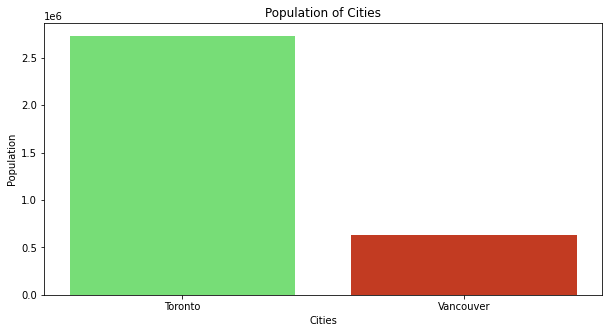

In [213]:
p=['Toronto','Vancouver']
n=[population_t, population_v]
plt.figure(figsize=(10,5))
plt.bar(p, n, color=['#77dd77','#c23b22'])
plt.xlabel("Cities") 
plt.ylabel("Population") 
plt.title("Population of Cities") 
plt.show()

---->Toronto has more inhabitants

Crime Rate

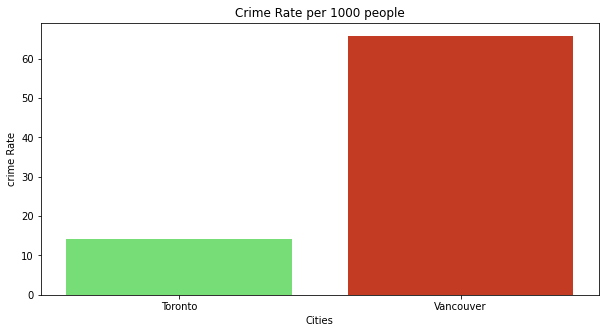

In [216]:
n=[(totalcrimesToronto/population_t)*1000,(totalcrimesVancouver/population_v)*1000]
plt.figure(figsize=(10,5))
plt.bar(p, n, color=['#77dd77','#c23b22'])
plt.xlabel("Cities") 
plt.ylabel("crime Rate") 
plt.title("Crime Rate per 1000 people") 
plt.show()

---->Toronto's crime rate is the lowest

Distance Between School and Neighborhood 

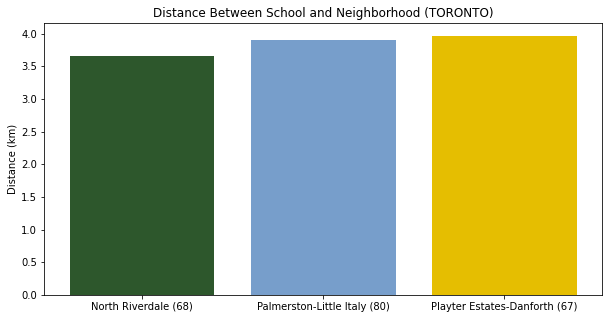

In [239]:
plt.figure(figsize=(10,5))
plt.bar(best_toronto["Neighbourhood"], best_toronto["Distance_km"], color=['#2d572c','#779ecb','#e5be01'])
plt.ylabel('Distance (km)')
plt.title('Distance Between School and Neighborhood (TORONTO)')
plt.show()

----> North Riverdale is the closest Toronto neighborhood to the school

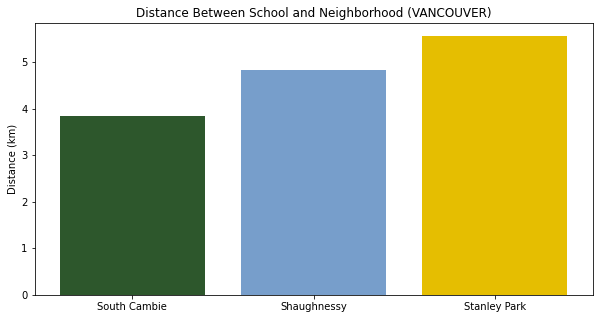

In [238]:
plt.figure(figsize=(10,5))
plt.bar(best_vancouver["NEIGHBOURHOOD"], best_vancouver["Distance_km"], color=['#2d572c','#779ecb','#e5be01'])
plt.ylabel('Distance (km)')
plt.title('Distance Between School and Neighborhood (VANCOUVER)')
plt.show()

----> South Cambie is the closest Vancouver neighborhood to the school

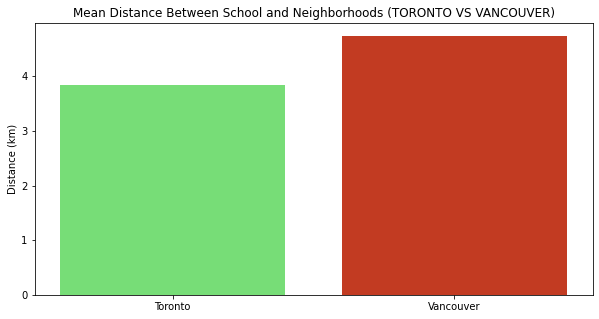

In [233]:

d=[best_toronto["Distance_km"].mean(), best_vancouver["Distance_km"].mean()]

plt.figure(figsize=(10,5))
plt.bar(p, d, color=['#77dd77','#c23b22'])
plt.ylabel('Distance (km)')
plt.title('Mean Distance Between School and Neighborhoods (TORONTO VS VANCOUVER)')
plt.show()

----> The safest neighborhoods in Toronto are closer to the school

With these simple indicators we can determine that the **city of Toronto is safer** to study English at the school **"Kaplan International Languages"** located at: 35 The Esplanade # 250, Toronto, ON M5E 1Z4, Canada

Now the best neighborhood will be determined

In [254]:
BN=best_toronto[['Neighbourhood','Count','Distance_km']]
index=[]
for i in range(3):
    x=(best_toronto['Count'].iloc[i])*(best_toronto['Distance_km'].iloc[i])
    index.append(int(x))
BN['Index']=index
BN=BN.sort_values('Index')
BN

<ipython-input-254-8a931f221aa7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BN['Index']=index


,Neighbourhood,Count,Distance_km,Index
97,Playter Estates-Danforth (67),139,3.964881,551
88,North Riverdale (68),169,3.663167,619
94,Palmerston-Little Italy (80),190,3.905629,742


# Summary

This program compares the Canadian cities of Vancouver and Toronto from the point of view of security from the crimes committed in 2019, analyzing their neighborhoods around English schools in order to determine which city is safer.

**"Playter Estates-Danforth"** , Toronto, Ontario, is the best neighborhood to live while studying at "Kaplan International Languages" school.

<hr>


# Author
Romero, Richard.
February 17, 2021